In [189]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (mmingyeong@kasi.re.kr)
# @Date: 2023-12-07
# @Filename: work.ipynb
# work.

import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import math

import pandas as pd

In [190]:
# Data Preparation

colors_data_set1 = "./colors.txt"

open_data_set1 = open(colors_data_set1, "r")

df_data_set1 = pd.read_csv(colors_data_set1, names=["R", "G", "B", "label"], header=None, sep = ' ')
#df_MCMC_data_set1 = pd.DataFrame(open_MCMC_data_set1)
# x position y value y error

In [191]:
r_data = df_data_set1["R"]
g_data = df_data_set1["G"]
b_data = df_data_set1["B"]
label = df_data_set1["label"]

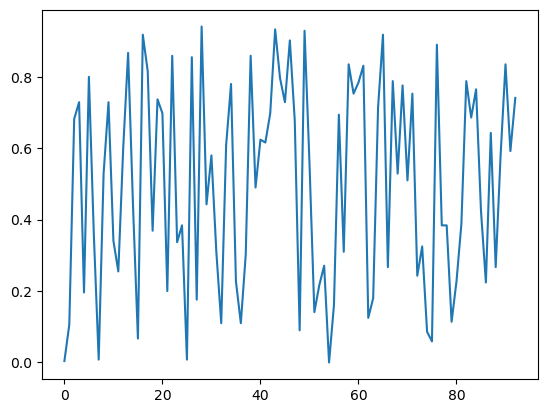

In [192]:
# red detector
plt.figure()
plt.plot(r_data)

In [193]:
lable_y = []

for val in label:
    if val == "red":
        lable_y.append(1)
    elif val == "blue":
        lable_y.append(0)
    else:
        print("wrong")

In [194]:
len(r_data)

93

In [195]:
len(lable_y)

93

In [196]:
import random
beta0_list = []
beta1_list = []
for i in range(50):
    beta0 = -random.randint(1,30)
    beta1 = -random.randint(1,30)
    beta0_list.append(beta0)
    beta1_list.append(beta1)
    
for i in range(50):
    beta0 = random.randint(1,30)
    beta1 = random.randint(1,30)
    beta0_list.append(beta0)
    beta1_list.append(beta1)

print(beta0_list)

[-17, -8, -6, -5, -26, -29, -29, -22, -5, -28, -24, -16, -23, -5, -16, -10, -19, -20, -27, -10, -20, -9, -18, -5, -11, -26, -3, -24, -16, -30, -7, -16, -21, -21, -17, -2, -4, -23, -27, -6, -13, -27, -20, -13, -10, -23, -13, -9, -13, -3, 26, 13, 4, 9, 28, 22, 23, 5, 23, 12, 23, 17, 6, 6, 28, 20, 1, 21, 11, 29, 25, 7, 8, 9, 11, 26, 1, 5, 5, 11, 24, 3, 24, 8, 10, 12, 6, 9, 13, 15, 11, 4, 6, 13, 21, 1, 15, 22, 18, 9]


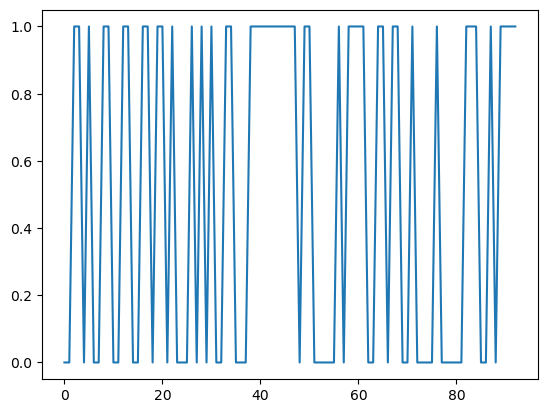

In [201]:
plt.plot(lable_y)

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(r_data, lable_y)

In [198]:
cost_list = []
for i in range(len(beta0_list)):
    z_list = []
    for x in X_train:
        z = beta0_list[i] + beta1_list[i]*x
        z_list.append(z)

    f_list = []
    for z in z_list:
        f_val = 1/(1+np.exp(-z))
        f_list.append(f_val)

    M = len(X_train)
    sum = 0
    for i in range(len(f_list)):
        j_val = -Y_train[i]*np.log(f_list[i])-(1-Y_train[i])*np.log(1-f_list[i])
        sum = sum + j_val
    
    res = sum/M
    cost_list.append(res)


C:\Users\mming\AppData\Local\Temp\ipykernel_29280\3354457259.py:16: RuntimeWarning: divide by zero encountered in log
  j_val = -Y_train[i]*np.log(f_list[i])-(1-Y_train[i])*np.log(1-f_list[i])
C:\Users\mming\AppData\Local\Temp\ipykernel_29280\3354457259.py:16: RuntimeWarning: invalid value encountered in scalar multiply
  j_val = -Y_train[i]*np.log(f_list[i])-(1-Y_train[i])*np.log(1-f_list[i])


In [199]:
newlist = [x for x in cost_list if math.isnan(x) == False]
print(newlist)

[18.575057972943036, 10.669136326863791, 6.471418730457995, 4.193465757297084, 19.637971014493047, 19.271956521739146, 23.233710144927546, 14.84365217393776, 6.353702679679627, 22.035130434782644, 13.999376811599753, 12.334246386102173, 12.440637681185027, 8.514458896105715, 9.813130453964078, 14.146755869001947, 18.811260869836495, 10.645695652835142, 15.074000000000323, 13.786596501111168, 15.687927536368122, 11.86770263877767, 12.210289856666822, 7.434057002527386, 9.942943407822566, 18.557492753623524, 6.1209056605411565, 18.32128985507476, 9.092811622288968, 20.110376811594204, 6.9495157265045, 12.334246386102173, 17.966985507287994, 17.246666666711075, 13.892985510117322, 6.368415217873246, 9.837549221571978, 15.321913043487353, 13.993521739131038, 11.873676090057081, 14.1408986747478, 16.15447826086979, 18.929362318942538, 12.340101598683205, 12.34595909203723, 21.804782608700354, 8.73850757856077, 12.227861843607522, 8.378348211356888, 8.640838498400568, 8.933101672698523, 2.23

In [200]:
np.min(newlist)

1.984199998914718